In [42]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
from bs4 import BeautifulSoup
import requests
import re
from tabulate import tabulate


In [43]:
#Select the resource to download

url =  "https://api.scrapingdog.com/scrape?api_key=657d00aef70c6975e9a97da0&url=https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue&dynamic=false"

In [44]:
#create a web page
response = requests.get(url)
print(response.status_code)

200


In [45]:
#transform HTML
#
if response:
    # We transform the flat HTML into real HTML (structured and nested, tree-like)
    soup = BeautifulSoup(response.content, 'html.parser')
    print(soup)


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon.ico" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&

In [46]:
# Assuming 'html_content' contains your HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Finding all table elements
tables = soup.find_all('table')

# Check if there are at least two tables
if len(tables) >= 2:
    # Selecting the second table
    second_table = tables[1]

    # Extracting and storing data from the second table
    web_content = []
    for row in second_table.find_all('tr'):
        columns = row.find_all(['td', 'th'])
        if len(columns) >= 2:
            date = columns[0].get_text().strip()
            revenue = columns[1].get_text().strip().replace('$', '').replace(',', '')
            web_content.append([date, revenue])

    df = pd.DataFrame(web_content, columns=['Date', 'Revenue'])

    # Print the DataFrame
    print(df)
else:
    print("There are not enough tables in the provided HTML")


          Date Revenue
0   2023-09-30   23350
1   2023-06-30   24927
2   2023-03-31   23329
3   2022-12-31   24318
4   2022-09-30   21454
5   2022-06-30   16934
6   2022-03-31   18756
7   2021-12-31   17719
8   2021-09-30   13757
9   2021-06-30   11958
10  2021-03-31   10389
11  2020-12-31   10744
12  2020-09-30    8771
13  2020-06-30    6036
14  2020-03-31    5985
15  2019-12-31    7384
16  2019-09-30    6303
17  2019-06-30    6350
18  2019-03-31    4541
19  2018-12-31    7226
20  2018-09-30    6824
21  2018-06-30    4002
22  2018-03-31    3409
23  2017-12-31    3288
24  2017-09-30    2985
25  2017-06-30    2790
26  2017-03-31    2696
27  2016-12-31    2285
28  2016-09-30    2298
29  2016-06-30    1270
30  2016-03-31    1147
31  2015-12-31    1214
32  2015-09-30     937
33  2015-06-30     955
34  2015-03-31     940
35  2014-12-31     957
36  2014-09-30     852
37  2014-06-30     769
38  2014-03-31     621
39  2013-12-31     615
40  2013-09-30     431
41  2013-06-30     405
42  2013-03

In [47]:
# Remove $ and commas and convert 'Revenue' column to numeric
df['Revenue'] = pd.to_numeric(df['Revenue'].str.replace('[\$,]', '', regex=True), errors='coerce')

# Remove rows with empty or no information
df = df.dropna()

# Print the cleaned DataFrame
print(df)

          Date  Revenue
0   2023-09-30  23350.0
1   2023-06-30  24927.0
2   2023-03-31  23329.0
3   2022-12-31  24318.0
4   2022-09-30  21454.0
5   2022-06-30  16934.0
6   2022-03-31  18756.0
7   2021-12-31  17719.0
8   2021-09-30  13757.0
9   2021-06-30  11958.0
10  2021-03-31  10389.0
11  2020-12-31  10744.0
12  2020-09-30   8771.0
13  2020-06-30   6036.0
14  2020-03-31   5985.0
15  2019-12-31   7384.0
16  2019-09-30   6303.0
17  2019-06-30   6350.0
18  2019-03-31   4541.0
19  2018-12-31   7226.0
20  2018-09-30   6824.0
21  2018-06-30   4002.0
22  2018-03-31   3409.0
23  2017-12-31   3288.0
24  2017-09-30   2985.0
25  2017-06-30   2790.0
26  2017-03-31   2696.0
27  2016-12-31   2285.0
28  2016-09-30   2298.0
29  2016-06-30   1270.0
30  2016-03-31   1147.0
31  2015-12-31   1214.0
32  2015-09-30    937.0
33  2015-06-30    955.0
34  2015-03-31    940.0
35  2014-12-31    957.0
36  2014-09-30    852.0
37  2014-06-30    769.0
38  2014-03-31    621.0
39  2013-12-31    615.0
40  2013-09-30  

In [48]:
import sqlite3

In [49]:
#Create a connection to the SQLite database
conn = sqlite3.connect('quarterly_review.db')

In [50]:
#Creates a cursor object
engine = conn.cursor()


In [51]:
#Create the table in the database
engine.execute("""
               CREATE TABLE IF NOT EXISTS quarterly_review (
               Date TEXT,
               Revenue REAL
)
""")

In [52]:
#iterates over the rows (Date, Revenue)
for index, row in df.iterrows():
    engine.execute("""
        INSERT INTO quarterly_review (Date, Revenue) VALUES (?, ?)
    """, (row['Date'], row['Revenue']))

In [53]:
#Commit the changes
conn.commit()


In [54]:
#Prints out data from the database

for row in engine.execute("""SELECT * FROM quarterly_review"""):
    print(row)

('2023-09-30', 23350.0)
('2023-06-30', 24927.0)
('2023-03-31', 23329.0)
('2022-12-31', 24318.0)
('2022-09-30', 21454.0)
('2022-06-30', 16934.0)
('2022-03-31', 18756.0)
('2021-12-31', 17719.0)
('2021-09-30', 13757.0)
('2021-06-30', 11958.0)
('2021-03-31', 10389.0)
('2020-12-31', 10744.0)
('2020-09-30', 8771.0)
('2020-06-30', 6036.0)
('2020-03-31', 5985.0)
('2019-12-31', 7384.0)
('2019-09-30', 6303.0)
('2019-06-30', 6350.0)
('2019-03-31', 4541.0)
('2018-12-31', 7226.0)
('2018-09-30', 6824.0)
('2018-06-30', 4002.0)
('2018-03-31', 3409.0)
('2017-12-31', 3288.0)
('2017-09-30', 2985.0)
('2017-06-30', 2790.0)
('2017-03-31', 2696.0)
('2016-12-31', 2285.0)
('2016-09-30', 2298.0)
('2016-06-30', 1270.0)
('2016-03-31', 1147.0)
('2015-12-31', 1214.0)
('2015-09-30', 937.0)
('2015-06-30', 955.0)
('2015-03-31', 940.0)
('2014-12-31', 957.0)
('2014-09-30', 852.0)
('2014-06-30', 769.0)
('2014-03-31', 621.0)
('2013-12-31', 615.0)
('2013-09-30', 431.0)
('2013-06-30', 405.0)
('2013-03-31', 562.0)
('2012-12-

In [39]:
#close the connection
#conn.close()

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

         Date  Revenue
0  2023-09-30  23350.0
1  2023-06-30  24927.0
2  2023-03-31  23329.0
3  2022-12-31  24318.0
4  2022-09-30  21454.0


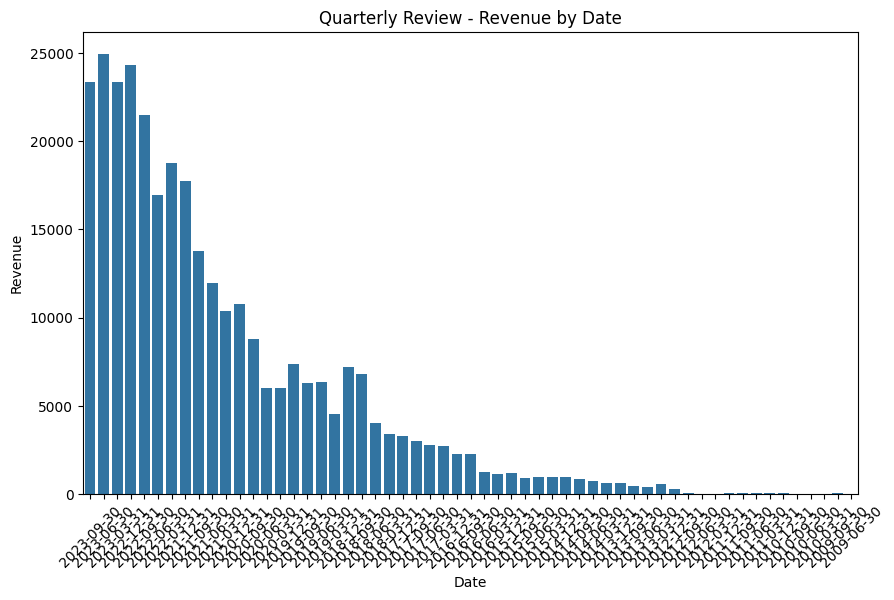

In [56]:
#Loads data into a DataFrame
df = pd.read_sql_query("SELECT * FROM quarterly_review", conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
print(df.head())

# Analyzing the data with charts

# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Date', y='Revenue', data=df)
plt.title('Quarterly Review - Revenue by Date')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

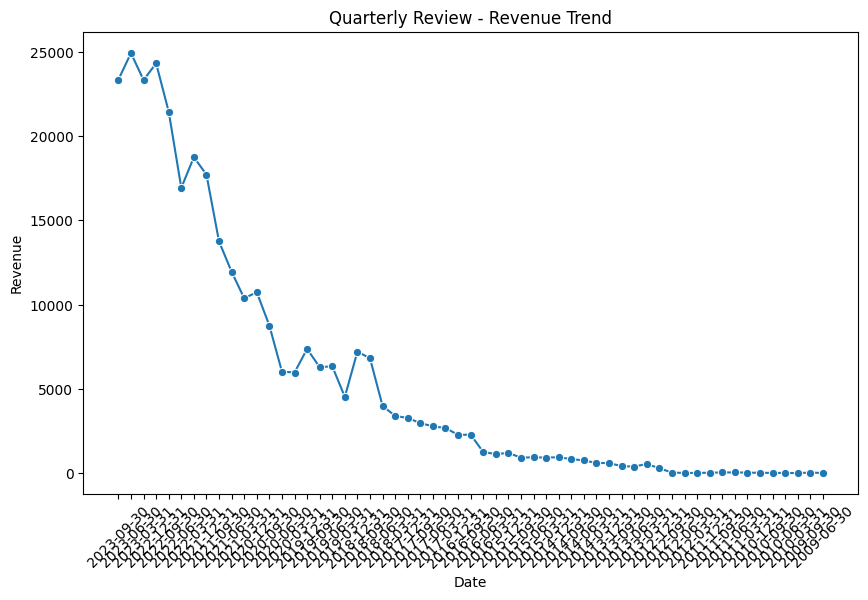

In [57]:
# Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Revenue', data=df, marker='o')
plt.title('Quarterly Review - Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


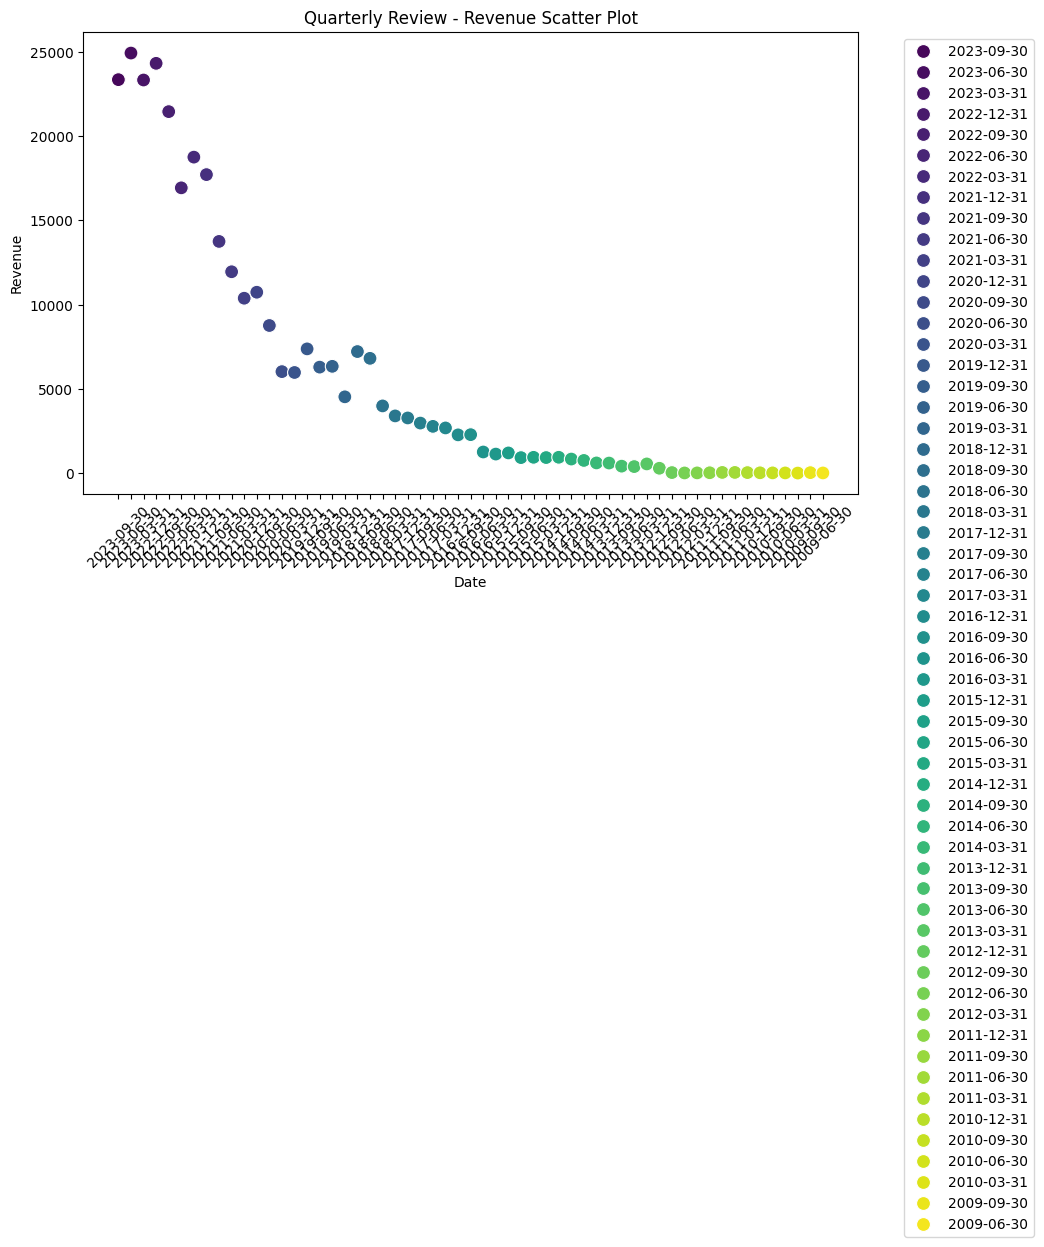

In [58]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Revenue', data=df, hue='Date', palette='viridis', s=100)
plt.title('Quarterly Review - Revenue Scatter Plot')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()